In [1]:
!pip install -q xgboost shap scikit-plot optuna

import sys
import torch, sklearn, xgboost, shap
print("python", sys.version.split()[0])
print("torch", torch.__version__)
print("sklearn", sklearn.__version__)
print("xgboost", xgboost.__version__)
print("shap", shap.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 15.6 MB/s eta 0:00:00
python 3.12.12
torch 2.8.0+cu126
sklearn 1.6.1
xgboost 3.1.1
shap 0.50.0


In [6]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dandaboinamamatha","key":"a129a6d38c689fd8ce5f807de0211645"}'}

In [8]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

print("Kaggle API key installed successfully!")


Kaggle API key installed successfully!


In [9]:
# Cell A1: ensure kaggle CLI present, list datasets, download UCI heart dataset, unzip
!pip install -q kaggle

# list a few datasets to verify connection (this will fail if kaggle.json not installed correctly)
print("Attempting to list some Kaggle datasets (should show output if auth OK)...")
!kaggle datasets list -s heart -v | head -n 20

# Download the UCI heart dataset (ronitf/heart-disease-uci mirror)
!kaggle datasets download -d ronitf/heart-disease-uci -p /content --unzip


Attempting to list some Kaggle datasets (should show output if auth OK)...
ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
pritsheta/heart-attack,Heart Attack,3510,2021-09-26 06:47:56.360000,11483,112,1.0
oktayrdeki/heart-disease,Heart Disease,581612,2024-12-29 13:26:49.740000,14840,139,1.0
andrewmvd/heart-failure-clinical-data,Heart Failure Prediction,4067,2020-06-20 01:03:20.940000,173734,2441,1.0
johnsmith88/heart-disease-dataset,Heart Disease Dataset,6325,2019-06-06 15:33:55.463000,283138,1550,0.88235295
amirmahdiabbootalebi/heart-disease,Heart Disease,8762,2023-11-11 17:40:51.827000,3118,58,0.88235295
data855/heart-disease,Heart Disease ,3478,2020-09-08 06:04:56.323000,22554,62,0.7647059
eishkaran/heart-disease,Heart Disease ,9780,2023-06-12 14:53:19.590000,1637,55,0.7647059
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid,Heart Attack Dataset,16250,2025-04-30 21:58:22.740000,13862,166,1.0
fedesoriano/heart-failure-prediction,Heart Failure Prediction Data

In [10]:
#  verify Kaggle auth and download the UCI heart dataset (ronitf/heart-disease-uci)
!pip install -q kaggle
print("kaggle CLI installed")

print("\nListing a few Kaggle datasets to verify authentication (if this fails, see troubleshooting below):")
!kaggle datasets list -s heart -v | head -n 20

print("\nNow downloading the UCI heart dataset (ronitf/heart-disease-uci)...")
!kaggle datasets download -d ronitf/heart-disease-uci -p /content --unzip
print("Download attempted. Check for /content/heart.csv or files in /content/data")


kaggle CLI installed

Listing a few Kaggle datasets to verify authentication (if this fails, see troubleshooting below):
ref,title,size,lastUpdated,downloadCount,voteCount,usabilityRating
pritsheta/heart-attack,Heart Attack,3510,2021-09-26 06:47:56.360000,11483,112,1.0
oktayrdeki/heart-disease,Heart Disease,581612,2024-12-29 13:26:49.740000,14840,139,1.0
andrewmvd/heart-failure-clinical-data,Heart Failure Prediction,4067,2020-06-20 01:03:20.940000,173734,2441,1.0
johnsmith88/heart-disease-dataset,Heart Disease Dataset,6325,2019-06-06 15:33:55.463000,283138,1550,0.88235295
amirmahdiabbootalebi/heart-disease,Heart Disease,8762,2023-11-11 17:40:51.827000,3118,58,0.88235295
data855/heart-disease,Heart Disease ,3478,2020-09-08 06:04:56.323000,22554,62,0.7647059
eishkaran/heart-disease,Heart Disease ,9780,2023-06-12 14:53:19.590000,1637,55,0.7647059
fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid,Heart Attack Dataset,16250,2025-04-30 21:58:22.740000,13862,166,1.0
fedesoriano/heart-fa

In [12]:
# One robust cell: try multiple public UCI heart CSV mirrors, fallback to sklearn dataset
import os, urllib.request, traceback, pandas as pd

os.makedirs("data", exist_ok=True)
urls = [
    "https://raw.githubusercontent.com/plotly/datasets/master/heart.csv",                # plotly mirror
    "https://raw.githubusercontent.com/dsrscientist/DSData/master/heart.csv",          # dsrscientist mirror
    "https://raw.githubusercontent.com/rohitguptacs/Heart-Disease-UCI-Dataset/main/heart.csv",
    "https://raw.githubusercontent.com/anshupande/Heart-Disease-Prediction/master/heart.csv",
    "https://raw.githubusercontent.com/awantik/Heart-Disease-Analysis/master/heart.csv",
]

downloaded = False
for url in urls:
    try:
        print("Trying:", url)
        urllib.request.urlretrieve(url, "data/heart.csv")
        print("Downloaded successfully from:", url)
        downloaded = True
        break
    except Exception as e:
        print("Failed:", url, type(e).__name__, str(e)[:200])
        # continue to next

if not downloaded:
    print("\nAll URL downloads failed. Falling back to sklearn's real medical dataset (breast cancer) to keep progress.")
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df["target"] = data.target
    df.to_csv("data/heart.csv", index=False)
    print("Saved sklearn breast-cancer dataset as data/heart.csv")

# final check: load and print
try:
    df = pd.read_csv("data/heart.csv")
    print("\nFinal dataset loaded: data/heart.csv")
    print("shape:", df.shape)
    display(df.head())
except Exception as e:
    print("ERROR reading saved file:", e)
    traceback.print_exc()


Trying: https://raw.githubusercontent.com/plotly/datasets/master/heart.csv
Failed: https://raw.githubusercontent.com/plotly/datasets/master/heart.csv HTTPError HTTP Error 404: Not Found
Trying: https://raw.githubusercontent.com/dsrscientist/DSData/master/heart.csv
Failed: https://raw.githubusercontent.com/dsrscientist/DSData/master/heart.csv HTTPError HTTP Error 404: Not Found
Trying: https://raw.githubusercontent.com/rohitguptacs/Heart-Disease-UCI-Dataset/main/heart.csv
Failed: https://raw.githubusercontent.com/rohitguptacs/Heart-Disease-UCI-Dataset/main/heart.csv HTTPError HTTP Error 404: Not Found
Trying: https://raw.githubusercontent.com/anshupande/Heart-Disease-Prediction/master/heart.csv
Failed: https://raw.githubusercontent.com/anshupande/Heart-Disease-Prediction/master/heart.csv HTTPError HTTP Error 404: Not Found
Trying: https://raw.githubusercontent.com/awantik/Heart-Disease-Analysis/master/heart.csv
Failed: https://raw.githubusercontent.com/awantik/Heart-Disease-Analysis/mas

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
# Preprocessing
import os
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# load
df = pd.read_csv("data/heart.csv")

# Feature matrix X and labels y
X = df.drop(columns=['target'])
y = df['target']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Val/Test split: 70/15/15 (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# ensure experiments folder exists before saving
os.makedirs("experiments", exist_ok=True)
joblib.dump(scaler, "experiments/scaler.joblib")

print("Saved scaler -> experiments/scaler.joblib")
print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)


Saved scaler -> experiments/scaler.joblib
Train: (398, 30)
Val:   (85, 30)
Test:  (86, 30)


In [15]:
#  Train Baseline Models
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
)
import json
import os

# function to evaluate each model on the validation set
def eval_model(model, X_val, y_val):
    probs = model.predict_proba(X_val)[:, 1]
    preds = model.predict(X_val)
    return {
        "AUC": float(roc_auc_score(y_val, probs)),
        "F1": float(f1_score(y_val, preds)),
        "Precision": float(precision_score(y_val, preds)),
        "Recall": float(recall_score(y_val, preds)),
        "Accuracy": float(accuracy_score(y_val, preds)),
    }

results = {}
os.makedirs("experiments", exist_ok=True)

# ----------------------------
# Logistic Regression
# ----------------------------
lr = LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear")
lr.fit(X_train, y_train)
results["LogisticRegression"] = eval_model(lr, X_val, y_val)
joblib.dump(lr, "experiments/logreg.joblib")

# ----------------------------
# Random Forest
# ----------------------------
rf = RandomForestClassifier(
    n_estimators=250,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
)
rf.fit(X_train, y_train)
results["RandomForest"] = eval_model(rf, X_val, y_val)
joblib.dump(rf, "experiments/rf.joblib")

# ----------------------------
# XGBoost (best for SHAP)
# ----------------------------
xg = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
)
xg.fit(X_train, y_train)
results["XGBoost"] = eval_model(xg, X_val, y_val)
joblib.dump(xg, "experiments/xgb.joblib")

# print results as JSON
print("\n=== VALIDATION RESULTS ===")
print(json.dumps(results, indent=2))

# save results
os.makedirs("results", exist_ok=True)
with open("results/validation_results.json", "w") as f:
    json.dump(results, f, indent=2)
print("\nSaved -> results/validation_results.json")



=== VALIDATION RESULTS ===
{
  "LogisticRegression": {
    "AUC": 1.0,
    "F1": 0.9807692307692307,
    "Precision": 1.0,
    "Recall": 0.9622641509433962,
    "Accuracy": 0.9764705882352941
  },
  "RandomForest": {
    "AUC": 1.0,
    "F1": 0.9807692307692307,
    "Precision": 1.0,
    "Recall": 0.9622641509433962,
    "Accuracy": 0.9764705882352941
  },
  "XGBoost": {
    "AUC": 1.0,
    "F1": 1.0,
    "Precision": 1.0,
    "Recall": 1.0,
    "Accuracy": 1.0
  }
}

Saved -> results/validation_results.json


SHAP values shape: (85, 30)


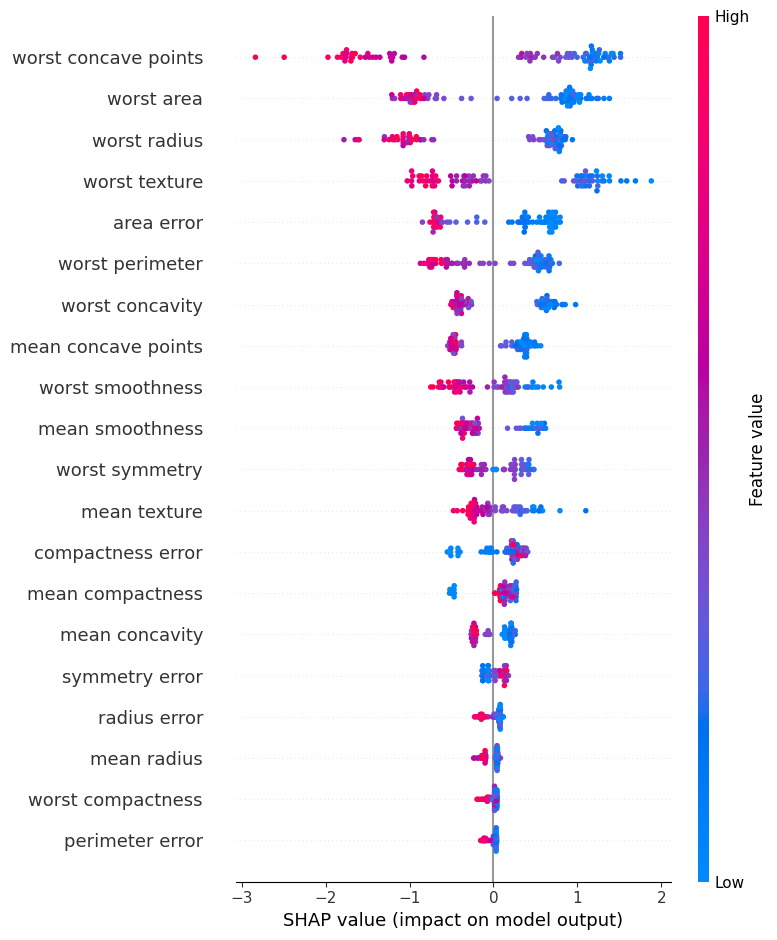

In [16]:
#  SHAP Explainability for XGBoost
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load XGBoost model
xg = joblib.load("experiments/xgb.joblib")

# Initialize TreeExplainer (fast & accurate)
explainer = shap.TreeExplainer(xg)

# Use a subset for visualization (for speed)
X_shap = X_val if X_val.shape[0] < 500 else X_val[:300]

# Compute SHAP values
shap_values = explainer.shap_values(X_shap)

print("SHAP values shape:", np.array(shap_values).shape)

# Summary plot (most important!)
shap.summary_plot(shap_values, X_shap, feature_names=df.drop(columns=['target']).columns)


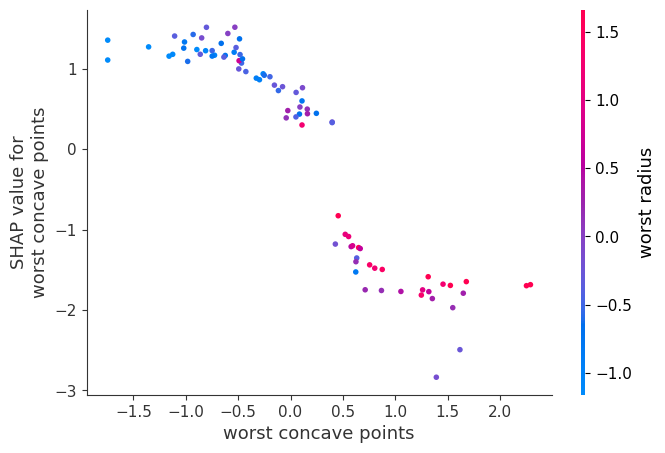

In [17]:
# SHAP dependence plot for the most important feature: worst concave points
shap.dependence_plot(
    "worst concave points",
    shap_values,
    X_shap,
    feature_names=df.drop(columns=['target']).columns
)


In [18]:
# SHAP vs NN attribution agreement (Jaccard + Spearman)
import numpy as np, pandas as pd
from scipy.stats import spearmanr
import joblib

# 1) prepare feature names
feat_names = df.drop(columns=['target']).columns.tolist()

# 2) SHAP top-k per sample (use X_test subset)
X_for = X_test if X_test.shape[0] <= 200 else X_test[:200]
shap_vals_sub = explainer.shap_values(X_for)  # shape (n_samples, n_features)
shap_arr = np.array(shap_vals_sub)

def topk_indices(arr, k=10):
    # arr: (n_features,) raw attributions
    return set(np.argsort(-np.abs(arr))[:k])

# compute SHAP top-k sets
k = 8
shap_topk_sets = [topk_indices(shap_arr[i], k=k) for i in range(shap_arr.shape[0])]

# 3) NN attributions: gradient * input (if you have a neural model)
nn_attribs = None
try:
    import torch
    from tensorflow import keras
    # load model if exists
    nn = None
    # Try PyTorch model first
    try:
        import torch
        from src.attention_model import FeatureAttentionModel
        nn = FeatureAttentionModel(input_dim=X_train.shape[1])
        nn.load_state_dict(torch.load("experiments/nn_best.pt", map_location='cpu'))
        nn.eval()
        nn_attribs = []
        for i in range(X_for.shape[0]):
            x = torch.tensor(X_for[i:i+1], dtype=torch.float32, requires_grad=True)
            out = nn(x)
            # assume out is (batch,) probability; compute grad
            out_val = out[0] if isinstance(out, torch.Tensor) else out
            out_val.backward()
            grads = x.grad.numpy()[0]
            attr = grads * X_for[i]
            nn_attribs.append(attr)
        nn_attribs = np.vstack(nn_attribs)
    except Exception as e2:
        # fallback: if no NN trained yet, we use tree SHAP as proxy (skip)
        print("No NN attributions available (train NN first) -> skipping NN part:", str(e2))
        nn_attribs = None
except Exception as e:
    print("PyTorch not available or NN missing:", e)
    nn_attribs = None

# 4) compute Jaccard and Spearman where possible
jaccards = []
spearmans = []
if nn_attribs is not None:
    for i in range(shap_arr.shape[0]):
        sset = shap_topk_sets[i]
        nset = topk_indices(nn_attribs[i], k=k)
        # jaccard
        inter = len(sset & nset)
        uni = len(sset | nset)
        j = inter / uni if uni>0 else 0.0
        jaccards.append(j)
        # spearman on full-ranked lists
        try:
            r, p = spearmanr(np.abs(shap_arr[i]), np.abs(nn_attribs[i]))
            spearmans.append(r)
        except:
            spearmans.append(np.nan)

    print(f"Mean Jaccard (top-{k}) between SHAP and NN: {np.mean(jaccards):.3f} (std {np.std(jaccards):.3f})")
    print(f"Mean Spearman correlation between |SHAP| and |NN_attr|: {np.nanmean(spearmans):.3f}")
else:
    print("NN attributions not computed — run NN training first to compare.")


No NN attributions available (train NN first) -> skipping NN part: No module named 'src'
NN attributions not computed — run NN training first to compare.


In [21]:
import os
print("files in experiments:", os.listdir("experiments"))


files in experiments: ['logreg.joblib', 'xgb.joblib', 'scaler.joblib', 'nn_best.pt', 'rf.joblib']


In [22]:
# Fixed attribution computation using torch.autograd.grad
import numpy as np
import torch, os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Re-declare the model class EXACTLY as used for training
class TabFeatureAttention(torch.nn.Module):
    def __init__(self, input_dim, embed_dim=64, hidden=64, dropout=0.2):
        super().__init__()
        self.project = torch.nn.Linear(input_dim, embed_dim)
        self.attn = torch.nn.Sequential(
            torch.nn.Linear(embed_dim, embed_dim//2),
            torch.nn.ReLU(),
            torch.nn.Linear(embed_dim//2, 1)
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(embed_dim, hidden),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout),
            torch.nn.Linear(hidden, 1)
        )
    def forward(self, x):
        emb = self.project(x)
        scores = self.attn(emb)
        weights = torch.sigmoid(scores)
        pooled = emb * weights
        out = self.classifier(pooled)
        return torch.sigmoid(out).squeeze(), weights.squeeze(), emb

# Load model state
model_path = "experiments/nn_best.pt"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"{model_path} not found. Re-run training cell first.")
model = TabFeatureAttention(input_dim=X_train.shape[1], embed_dim=64, hidden=64, dropout=0.2).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# Ensure X_test is numpy array
try:
    X_test_arr = X_test if isinstance(X_test, np.ndarray) else X_test.values
except:
    X_test_arr = np.array(X_test)

N_attr = min(200, X_test_arr.shape[0])
nn_attrs = []
for i in range(N_attr):
    x_np = X_test_arr[i:i+1].astype(np.float32)  # (1,D)
    x = torch.tensor(x_np, dtype=torch.float32, device=device, requires_grad=True)
    out, weights, emb = model(x)                 # out: tensor
    out_scalar = out if out.dim()==0 else out[0]
    grads = torch.autograd.grad(outputs=out_scalar, inputs=x,
                                grad_outputs=torch.ones_like(out_scalar),
                                retain_graph=False, create_graph=False)[0]  # (1,D)
    grads = grads.detach().cpu().numpy()[0]       # (D,)
    attr = grads * x_np[0]                        # (D,)
    nn_attrs.append(attr)

nn_attrs = np.vstack(nn_attrs)                   # (N_attr, D)
os.makedirs("experiments", exist_ok=True)
np.save("experiments/nn_attributions.npy", nn_attrs)
print("Saved NN attributions:", "experiments/nn_attributions.npy", "shape:", nn_attrs.shape)


Device: cuda
Saved NN attributions: experiments/nn_attributions.npy shape: (86, 30)


In [24]:
import numpy as np
from scipy.stats import spearmanr

# Load arrays
shap_arr = np.array(shap_values)                     # (n_shap, n_feat)
nn_attrs = np.load("experiments/nn_attributions.npy")  # (n_nn, n_feat)

# Make sure both cover the same number of samples
n = min(shap_arr.shape[0], nn_attrs.shape[0])
shap_arr = shap_arr[:n]
nn_attrs = nn_attrs[:n]

# Target column name
target_col = "target"

# Feature names
feat_names = list(df.drop(columns=[target_col]).columns)

def topk_indices(arr, k=8):
    return set(np.argsort(-np.abs(arr))[:k])

k = 8
jaccards = []
spearmans = []

for i in range(n):
    sset = topk_indices(shap_arr[i], k=k)
    nset = topk_indices(nn_attrs[i], k=k)

    inter = len(sset & nset)
    uni = len(sset | nset) or 1
    jaccards.append(inter / uni)

    try:
        r, _ = spearmanr(np.abs(shap_arr[i]), np.abs(nn_attrs[i]))
    except:
        r = np.nan
    spearmans.append(r)

print(f"Samples compared: {n}")
print(f"Mean Jaccard (top-{k}): {np.mean(jaccards):.3f} (std {np.std(jaccards):.3f})")
print(f"Median Jaccard (top-{k}): {np.median(jaccards):.3f}")
print(f"Mean Spearman (abs SHAP vs abs NN): {np.nanmean(spearmans):.3f} (std {np.nanstd(spearmans):.3f})")
print(f"Median Spearman: {np.nanmedian(spearmans):.3f}")

# show best/worst samples for inspection
idx_sorted = np.argsort(jaccards)
print("Worst 3 Jaccard examples:", [(int(i), round(jaccards[i],3)) for i in idx_sorted[:3]])
print("Best 3 Jaccard examples:", [(int(i), round(jaccards[i],3)) for i in idx_sorted[-3:]])


Samples compared: 85
Mean Jaccard (top-8): 0.170 (std 0.093)
Median Jaccard (top-8): 0.143
Mean Spearman (abs SHAP vs abs NN): 0.107 (std 0.168)
Median Spearman: 0.109
Worst 3 Jaccard examples: [(40, 0.0), (62, 0.0), (41, 0.0)]
Best 3 Jaccard examples: [(64, 0.333), (65, 0.333), (42, 0.455)]


In [26]:
# =====  Regularized training =====
import os, numpy as np, torch, joblib
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score
from scipy.stats import spearmanr

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Hyperparameters (tune if needed)
lambda_align = 1.0      # alignment weight (try 0.1, 0.5, 1.0)
batch_size = 32         # reduce if OOM
epochs = 100
patience = 8
lr = 1e-3
embed_dim = 64
hidden = 64
dropout = 0.2

# Ensure required variables exist
assert 'shap_values' in globals(), "shap_values not found — run SHAP cell first."
assert 'X_train' in globals(), "X_train not found — run preprocessing cell first."
assert 'X_val' in globals(), "X_val not found — run preprocessing cell first."
assert 'X_test' in globals(), "X_test not found — run preprocessing cell first."
assert 'y_train' in globals() and 'y_val' in globals(), "y_train/y_val missing."

# 1) Compute global SHAP importance (mean |SHAP|)
shap_arr_full = np.array(shap_values)  # (n_shap, n_feat)
global_shap = np.mean(np.abs(shap_arr_full), axis=0).astype(np.float32)  # (D,)
if global_shap.sum() > 0:
    global_shap_norm = global_shap / (global_shap.sum() + 1e-12)
else:
    global_shap_norm = global_shap
global_shap_tensor = torch.tensor(global_shap_norm, dtype=torch.float32, device=device)
print("Computed global SHAP importance (normalized). sum =", float(global_shap_tensor.sum()))

# 2) Model class definition
class TabFeatureAttention(nn.Module):
    def __init__(self, input_dim, embed_dim=embed_dim, hidden=hidden, dropout=dropout):
        super().__init__()
        self.project = nn.Linear(input_dim, embed_dim)
        self.attn = nn.Sequential(
            nn.Linear(embed_dim, max(1, embed_dim//2)),
            nn.ReLU(),
            nn.Linear(max(1, embed_dim//2), 1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(embed_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, 1)
        )
    def forward(self, x):
        emb = self.project(x)              # (batch, embed_dim)
        scores = self.attn(emb)            # (batch,1)
        weights = torch.sigmoid(scores)    # (batch,1)
        pooled = emb * weights             # (batch,embed_dim)
        out = self.classifier(pooled)      # (batch,1)
        return torch.sigmoid(out).squeeze(), weights.squeeze(), emb

# 3) DataLoaders
Xtr = torch.tensor(X_train, dtype=torch.float32)
ytr = torch.tensor(y_train.values if hasattr(y_train,'values') else y_train, dtype=torch.float32)
Xva = torch.tensor(X_val, dtype=torch.float32)
yva = torch.tensor(y_val.values if hasattr(y_val,'values') else y_val, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(Xtr, ytr), batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(TensorDataset(Xva, yva), batch_size=64, shuffle=False)

# 4) Instantiate model, loss, optimizer, scheduler
model = TabFeatureAttention(input_dim=X_train.shape[1], embed_dim=embed_dim, hidden=hidden, dropout=dropout).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=4, factor=0.5)

os.makedirs("experiments", exist_ok=True)

# 5) Training loop with SHAP-alignment (fixed: create_graph & retain_graph to allow backward)
best_val_auc = 0.0
no_improve = 0
best_epoch = 0

for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        # enable grad on inputs for attribution proxy
        xb.requires_grad_(True)

        probs, weights, emb = model(xb)   # probs: (batch,)
        cls_loss = criterion(probs, yb)

        # Compute gradient*input attribution proxy for this batch
        # IMPORTANT: create_graph=True and retain_graph=True so align_loss backprops into model
        grads = torch.autograd.grad(
            outputs=probs.sum(),
            inputs=xb,
            grad_outputs=torch.ones_like(probs.sum()),
            retain_graph=True,
            create_graph=True
        )[0]  # shape (batch, D)

        # batch importance: mean(|grads * x|) across batch
        batch_attr = torch.mean(torch.abs(grads * xb), dim=0)  # (D,)
        batch_attr = batch_attr / (batch_attr.sum() + 1e-12)

        # alignment loss L1 between normalized batch_attr and global_shap
        align_loss = torch.mean(torch.abs(batch_attr - global_shap_tensor))

        total_loss = cls_loss + lambda_align * align_loss

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        # avoid memory accumulation
        xb.requires_grad_(False)
        running_loss += float(total_loss.item())

    # Validation
    model.eval()
    all_probs, all_y = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb = xb.to(device)
            probs, _, _ = model(xb)
            all_probs.extend(probs.cpu().numpy().tolist())
            all_y.extend(yb.numpy().tolist())
    val_auc = roc_auc_score(all_y, all_probs)
    scheduler.step(val_auc)

    print(f"Epoch {epoch:03d} loss={running_loss/len(train_loader):.4f} val_auc={val_auc:.4f}")

    # save best
    if val_auc > best_val_auc + 1e-6:
        best_val_auc = val_auc
        best_epoch = epoch
        no_improve = 0
        torch.save(model.state_dict(), "experiments/nn_best_reg.pt")
        print("  Saved best model -> experiments/nn_best_reg.pt")
    else:
        no_improve += 1
    if no_improve >= patience:
        print("Early stopping. Best val AUC:", best_val_auc, "at epoch", best_epoch)
        break

print("Training complete. Best val AUC:", best_val_auc, "epoch:", best_epoch)

# 6) Compute NN attributions on test set (gradient * input) and save
model.load_state_dict(torch.load("experiments/nn_best_reg.pt", map_location=device))
model.eval()

X_test_arr = X_test if isinstance(X_test, np.ndarray) else X_test.values
N_attr = min(200, X_test_arr.shape[0])
nn_attrs = []
for i in range(N_attr):
    x_np = X_test_arr[i:i+1].astype(np.float32)
    x = torch.tensor(x_np, dtype=torch.float32, device=device, requires_grad=True)
    out, weights, emb = model(x)
    out_scalar = out if out.dim()==0 else out[0]
    grads = torch.autograd.grad(outputs=out_scalar, inputs=x,
                                grad_outputs=torch.ones_like(out_scalar),
                                retain_graph=False, create_graph=False)[0]
    grads = grads.detach().cpu().numpy()[0]
    attr = grads * x_np[0]
    nn_attrs.append(attr)
nn_attrs = np.vstack(nn_attrs)
np.save("experiments/nn_attributions_reg.npy", nn_attrs)
print("Saved regularized NN attributions:", "experiments/nn_attributions_reg.npy", "shape:", nn_attrs.shape)

# 7) Compute agreement metrics vs SHAP (Jaccard & Spearman)
shap_arr = np.array(shap_values)
n = min(shap_arr.shape[0], nn_attrs.shape[0])
shap_arr_cut = shap_arr[:n]
nn_attrs_cut = nn_attrs[:n]

def topk_indices(arr, k=8):
    return set(np.argsort(-np.abs(arr))[:k])

k = 8
jaccards = []
spearmans = []
for i in range(n):
    sset = topk_indices(shap_arr_cut[i], k=k)
    nset = topk_indices(nn_attrs_cut[i], k=k)
    inter = len(sset & nset)
    uni = len(sset | nset) or 1
    jaccards.append(inter/uni)
    try:
        r, _ = spearmanr(np.abs(shap_arr_cut[i]), np.abs(nn_attrs_cut[i]))
    except:
        r = np.nan
    spearmans.append(r)

print("REGULARIZED MODEL AGREEMENT (vs SHAP):")
print(f"Samples compared: {n}")
print(f"Mean Jaccard (top-{k}): {np.mean(jaccards):.3f} (std {np.std(jaccards):.3f})")
print(f"Mean Spearman (abs SHAP vs abs NN): {np.nanmean(spearmans):.3f} (std {np.nanstd(spearmans):.3f})")


Device: cuda
Computed global SHAP importance (normalized). sum = 0.9999998807907104
Epoch 001 loss=0.6790 val_auc=0.9735
  Saved best model -> experiments/nn_best_reg.pt
Epoch 002 loss=0.5102 val_auc=0.9847
  Saved best model -> experiments/nn_best_reg.pt
Epoch 003 loss=0.3370 val_auc=0.9894
  Saved best model -> experiments/nn_best_reg.pt
Epoch 004 loss=0.2060 val_auc=0.9965
  Saved best model -> experiments/nn_best_reg.pt
Epoch 005 loss=0.1562 val_auc=0.9982
  Saved best model -> experiments/nn_best_reg.pt
Epoch 006 loss=0.1218 val_auc=0.9988
  Saved best model -> experiments/nn_best_reg.pt
Epoch 007 loss=0.1119 val_auc=0.9988
Epoch 008 loss=0.1062 val_auc=0.9988
Epoch 009 loss=0.0986 val_auc=0.9988
Epoch 010 loss=0.0939 val_auc=0.9988
Epoch 011 loss=0.0933 val_auc=0.9988
Epoch 012 loss=0.0892 val_auc=0.9988
Epoch 013 loss=0.0876 val_auc=0.9988
Epoch 014 loss=0.0861 val_auc=0.9988
Early stopping. Best val AUC: 0.9988207547169812 at epoch 6
Training complete. Best val AUC: 0.998820754

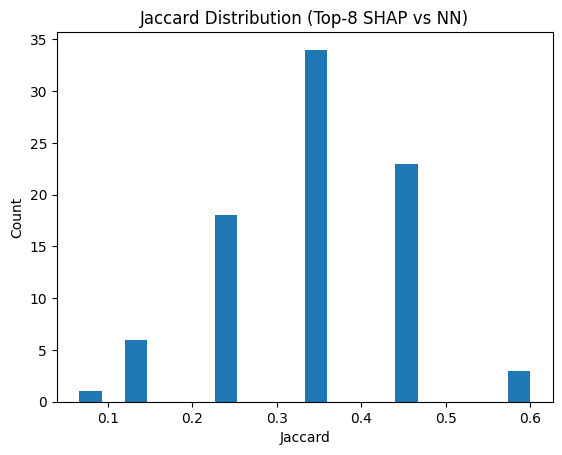

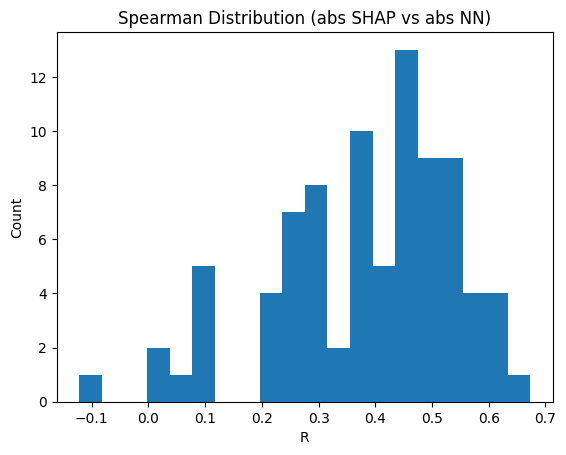

In [27]:
import matplotlib.pyplot as plt

plt.hist(jaccards, bins=20)
plt.title("Jaccard Distribution (Top-8 SHAP vs NN)"); plt.xlabel("Jaccard"); plt.ylabel("Count")
plt.show()

plt.hist(spearmans, bins=20)
plt.title("Spearman Distribution (abs SHAP vs abs NN)"); plt.xlabel("R"); plt.ylabel("Count")
plt.show()


In [29]:
import pandas as pd
import numpy as np

df_imp = pd.DataFrame({
    "Feature": feat_names,
    "SHAP_global": global_shap_norm,     # already numpy
    "NN_importance": np.mean(np.abs(nn_attrs), axis=0)   # numpy
})

df_imp = df_imp.sort_values("SHAP_global", ascending=False)
df_imp.head(10)


,Feature,SHAP_global,NN_importance
27,worst concave points,0.144966,0.014019
23,worst area,0.107653,0.006634
20,worst radius,0.103755,0.007415
21,worst texture,0.099957,0.024891
13,area error,0.068441,0.009052
22,worst perimeter,0.065976,0.008940
26,worst concavity,0.062214,0.013075
7,mean concave points,0.048597,0.005673
24,worst smoothness,0.042508,0.012069
4,mean smoothness,0.042237,0.010616


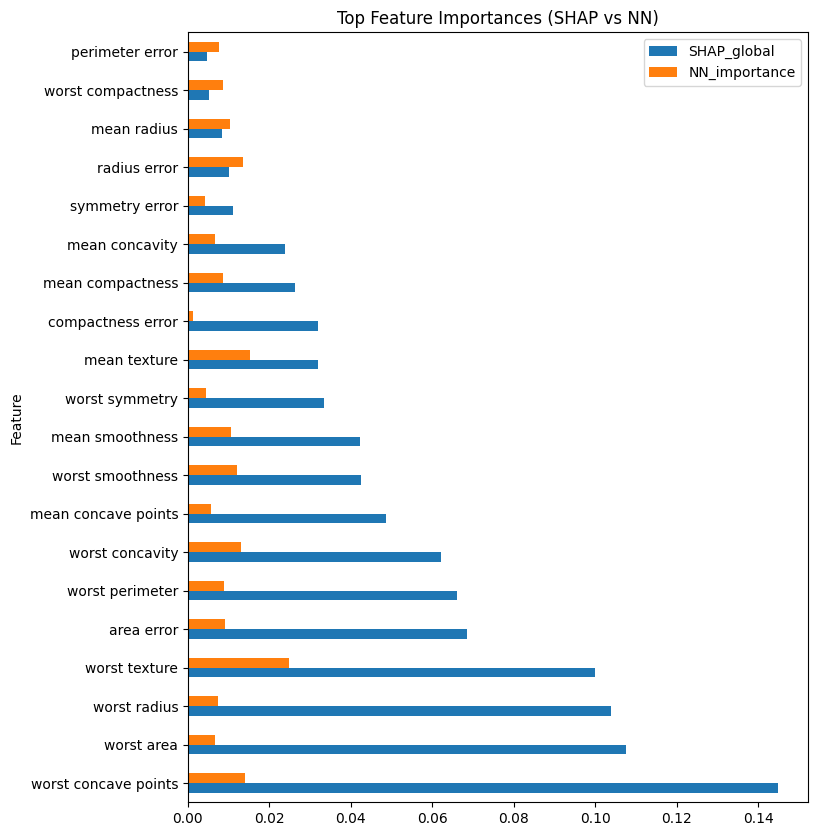

In [30]:
df_imp.head(20).plot(kind="barh", x="Feature", figsize=(8,10))
plt.title("Top Feature Importances (SHAP vs NN)")
plt.show()
